In [20]:
# -*- coding: utf-8 -*-
"""

@author: cngvng
"""

import pandas as pd
import numpy as np
import time

import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.decomposition import PCA

from utils import *

types = "short"

data_path_unsw_train = "dataset/UNSW_NB15_training-set.csv"
data_path_unsw_test = "dataset/UNSW_NB15_testing-set.csv"

n_compnents = 16
normalized = True
binary_classify = True
label = False  # label=False for Feature Extraction

""" Processing train data and test data for pca """

# ==>process training data
data_raw = pd.read_csv(data_path_unsw_train)
data_train = preprocessing_data_unsw(data_path=data_path_unsw_train, normalized=normalized,
                                     binary_classify=binary_classify)
y_train = data_train['label']
X_train = data_train.drop(columns=['label'])

===== Visualize compare raw_len to train_len =====


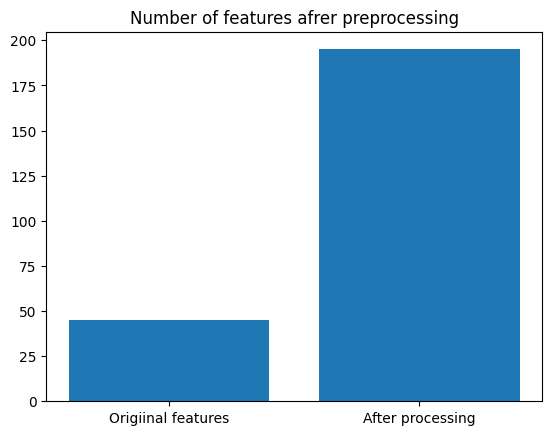

In [21]:
raw_len = len(data_raw.columns)
train_len = len(data_train.columns)
print("===== Visualize compare raw_len to train_len =====")
plt.bar(['Origiinal features', 'After processing'], [raw_len, train_len])
plt.title("Number of features afrer preprocessing")
plt.show()

In [22]:
data_test = pd.read_csv(data_path_unsw_test)
y_test = data_test['label']

In [23]:
data_test = data_test.drop(columns=['label'])
data_test['service'].replace('-', 'other', inplace=True)
data_test = pd.get_dummies(data_test, columns=pd.Index(['proto', 'service', 'state']))
data_test = align_test_dataset(data_test, data_train)

In [24]:
X_test = data_test

In [25]:
data_test.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,False,False,0,False,True,0,False,False,0,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,False,False,0,False,True,0,False,False,0,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,False,False,0,False,True,0,False,False,0,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,False,False,0,False,True,0,False,False,0,0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,False,False,0,False,True,0,False,False,0,0


In [26]:
from sklearn.cross_decomposition import PLSRegression

In [27]:
# Dimension reduction with PLSRegression
pls = PLSRegression(n_components=n_compnents)
pls.fit(X_train, y_train)
X_train_pls = pls.transform(X_train)

/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cngvng/anaconda3/envs/askme/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

In [28]:
X_train_pls.shape

(175341, 16)

In [29]:
X_train.shape

(175341, 194)

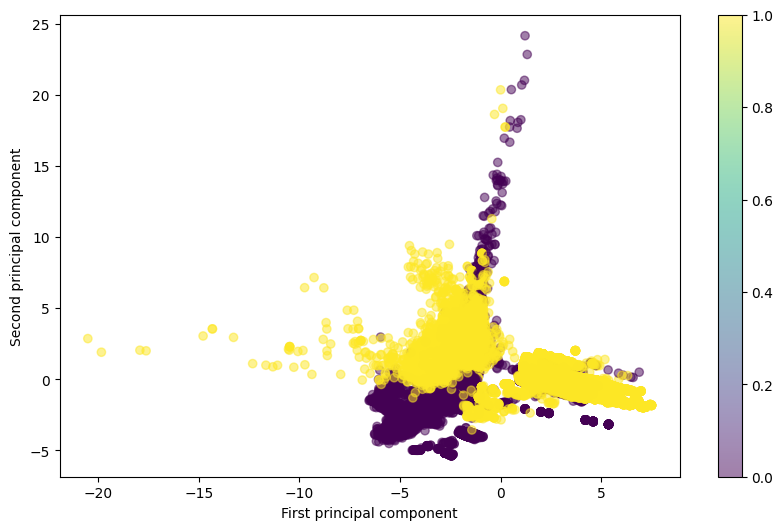

In [30]:
# Visualize the data after dimension reduction
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pls[:, 0], X_train_pls[:, 1], c=y_train, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar()

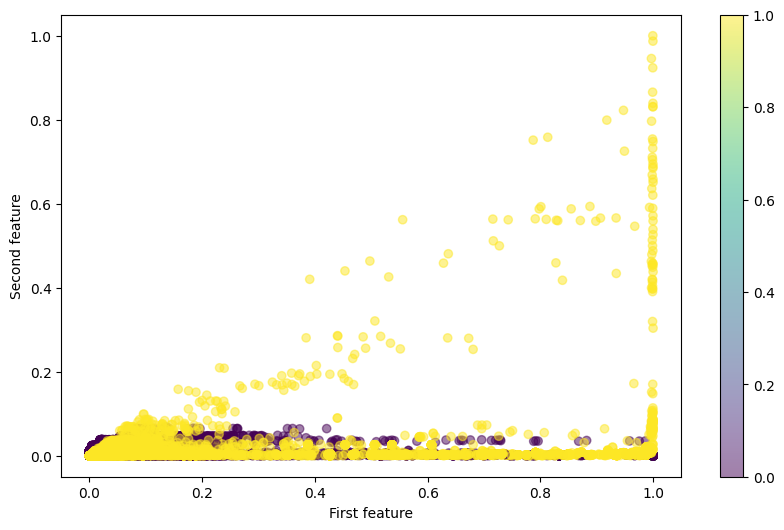

In [31]:
# Visualize the data before dimension reduction
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, alpha=0.5)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.colorbar()


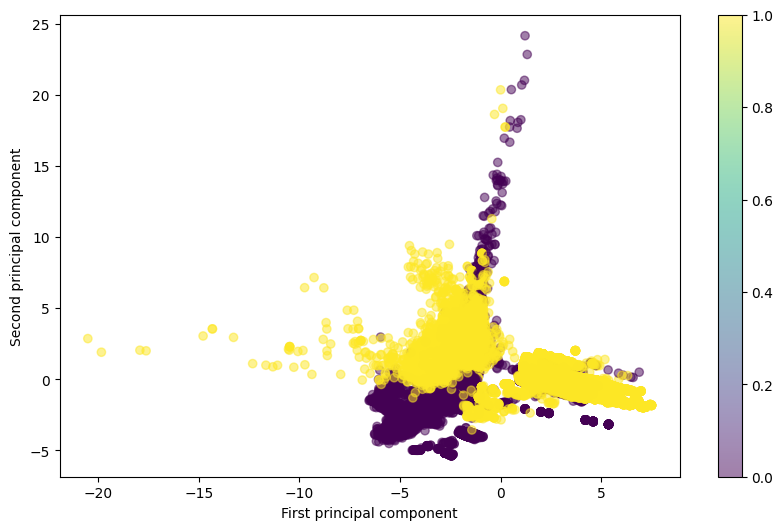

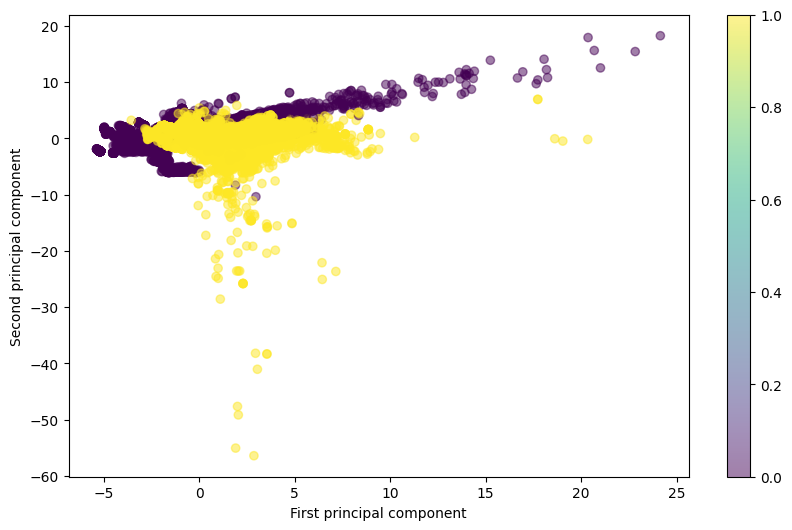

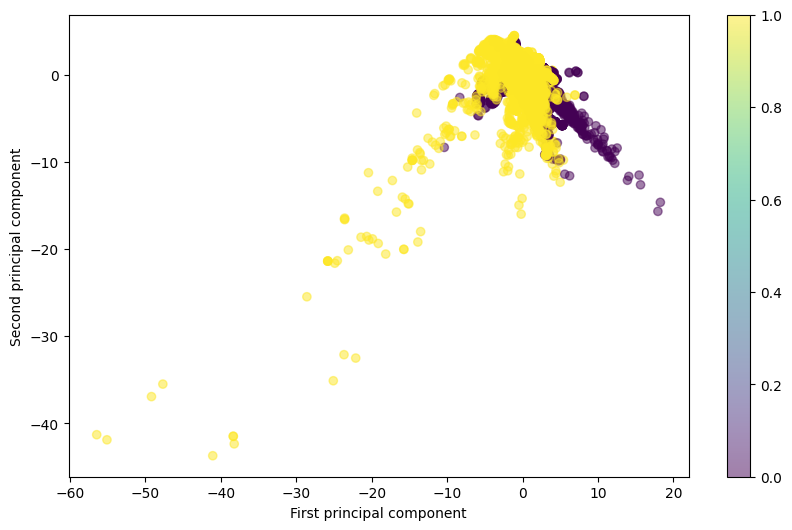

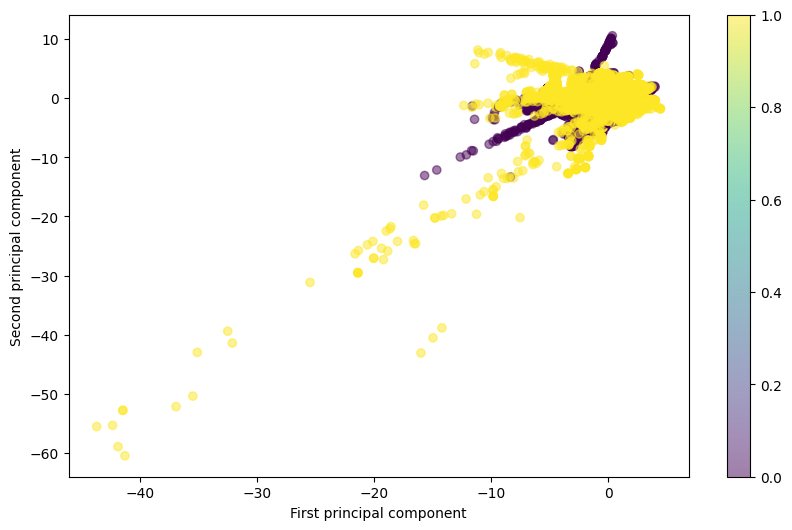

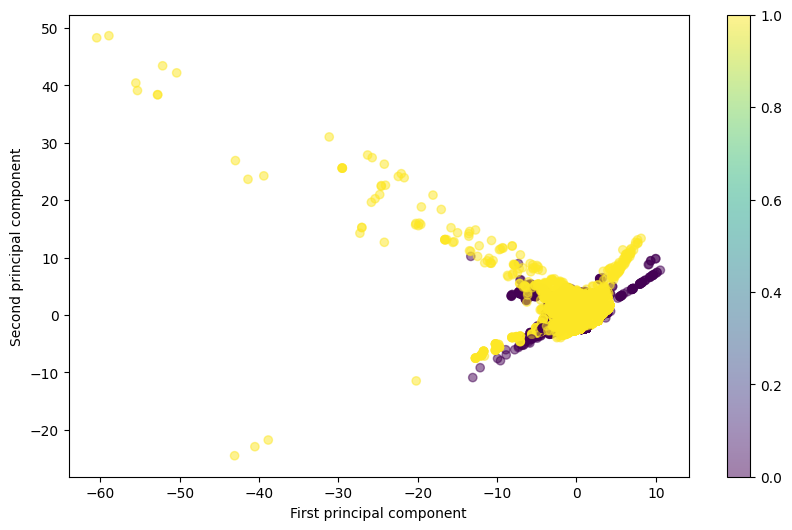

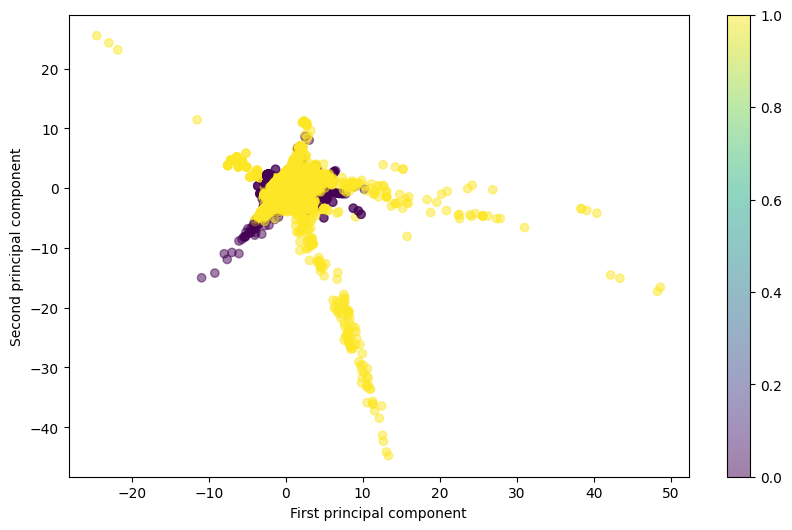

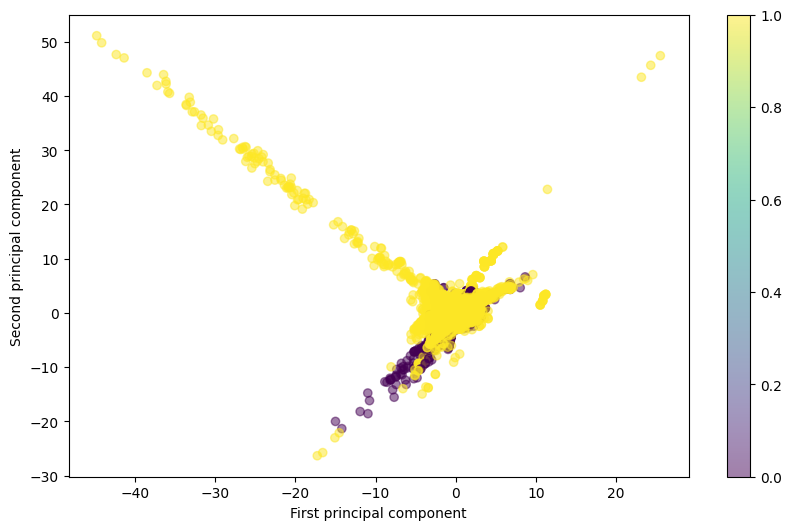

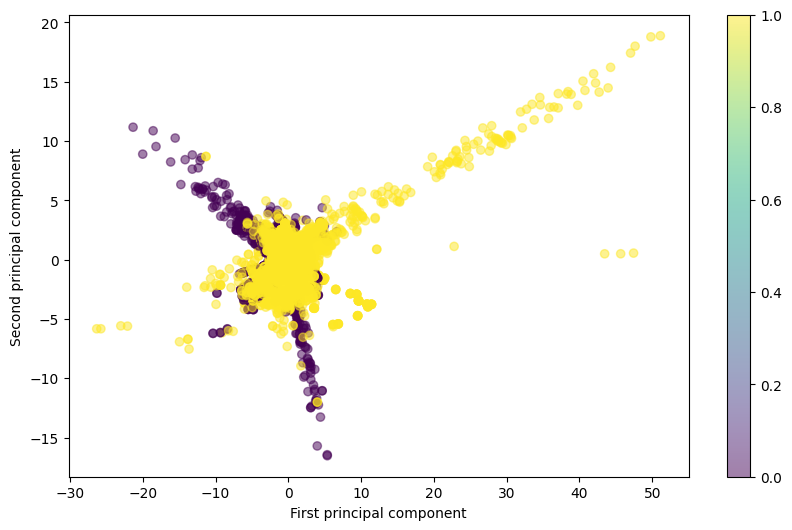

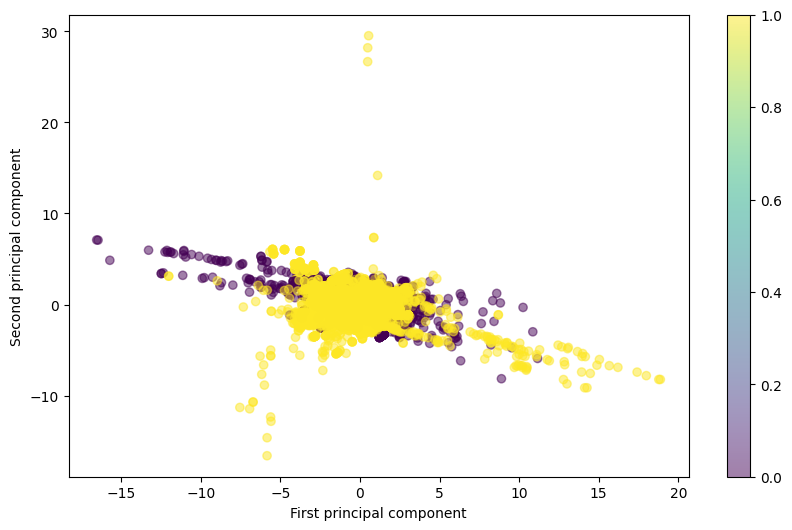

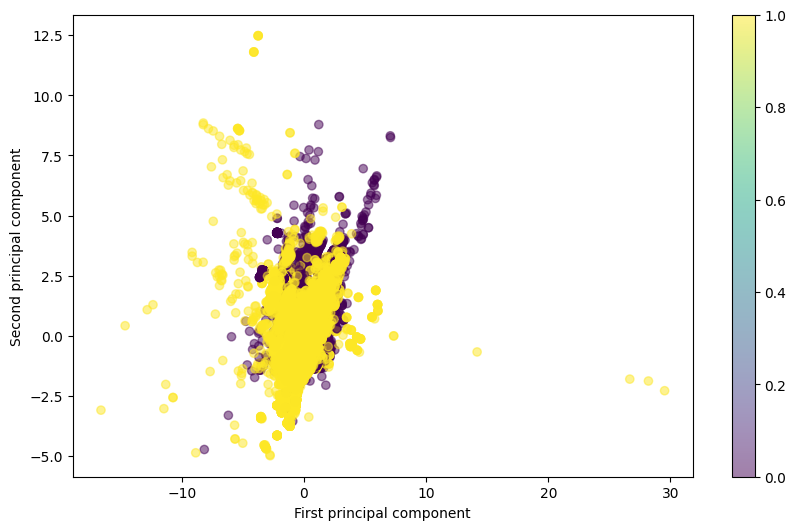

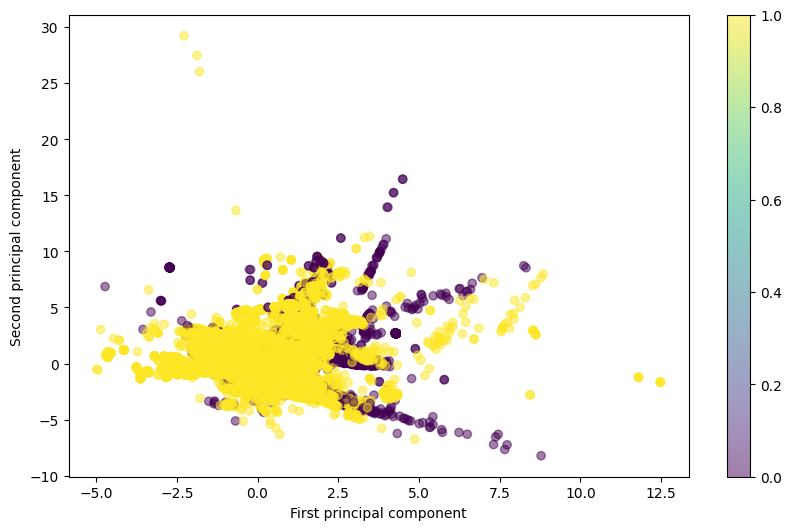

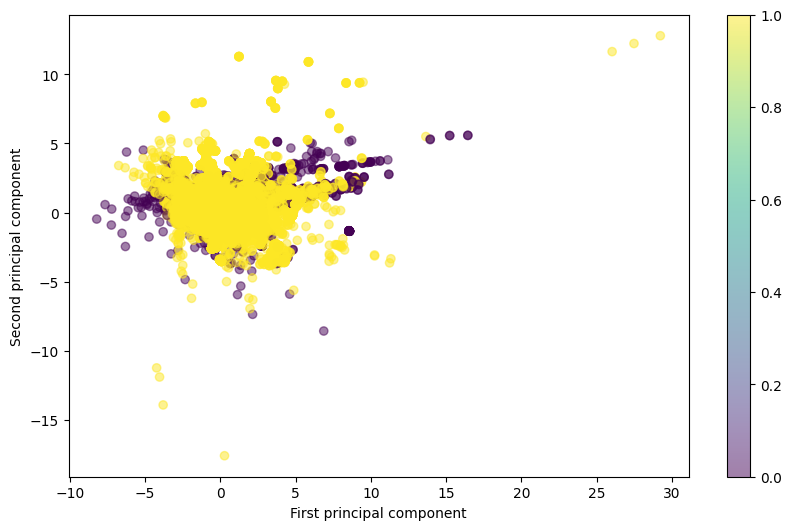

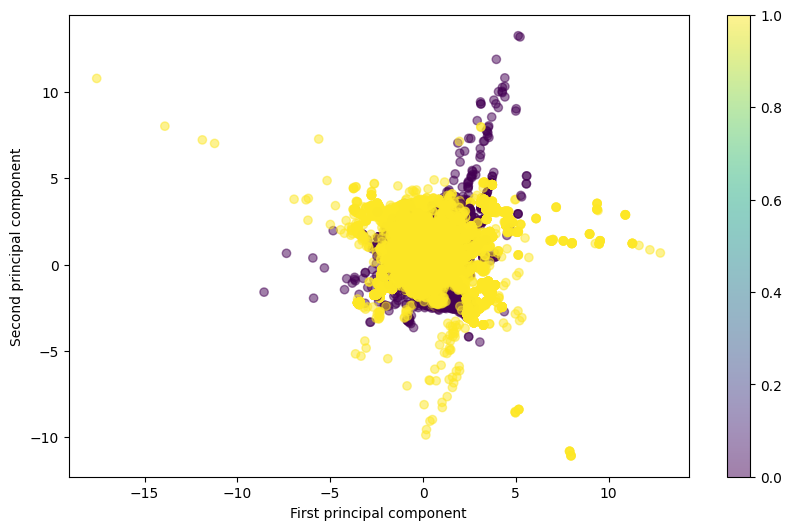

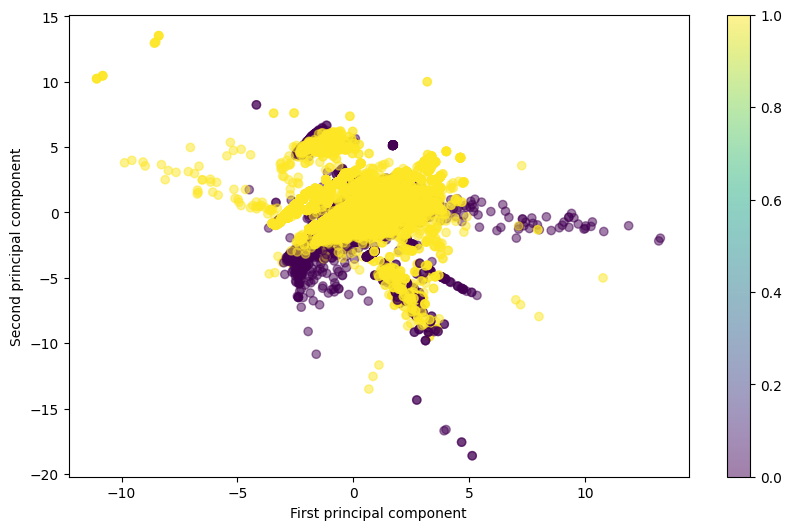

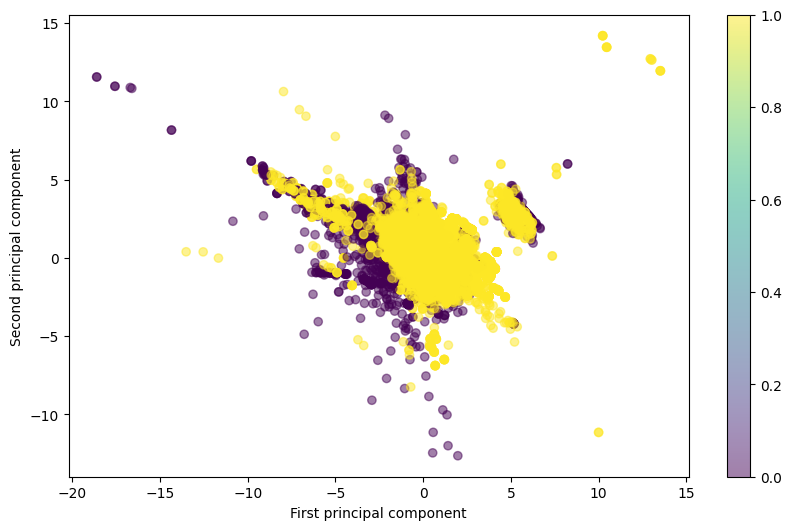

IndexError: index 16 is out of bounds for axis 1 with size 16

<Figure size 1000x600 with 0 Axes>

In [33]:
# Visulize the data after dimension reduction PLS for all features
# Visualize the data after dimension reduction all steps in one figure
for i in range(0, 16):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_pls[:, i], X_train_pls[:, i + 1], c=y_train, alpha=0.5)
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.colorbar()
    plt.show()

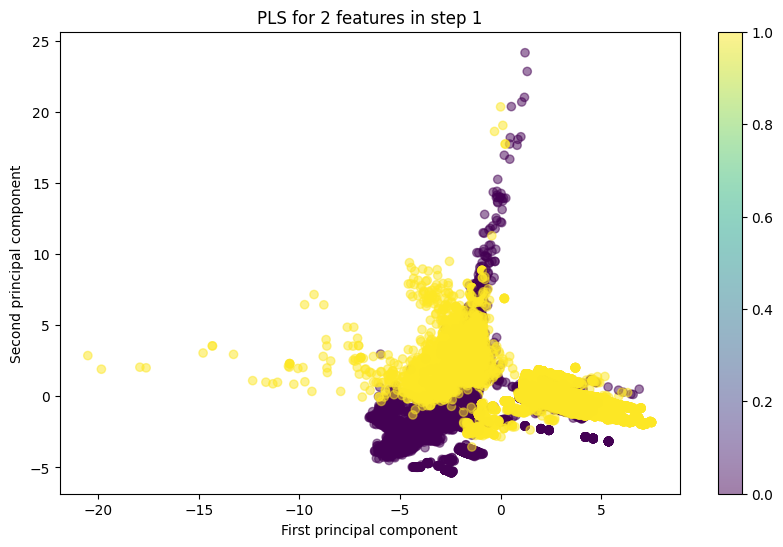

In [34]:
# Example Visualize the data after dimension reduction PLS for 2 features in step 1
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pls[:, 0], X_train_pls[:, 1], c=y_train, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar()
plt.title("PLS for 2 features in step 1")
plt.show()

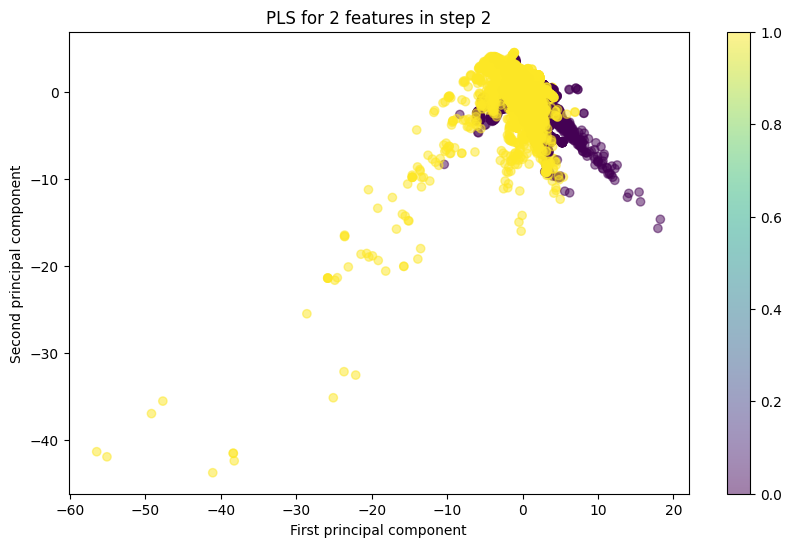

In [35]:
# Example Visualize the data after dimension reduction PLS for 2 features in step 2
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pls[:, 2], X_train_pls[:, 3], c=y_train, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar()
plt.title("PLS for 2 features in step 2")
plt.show()

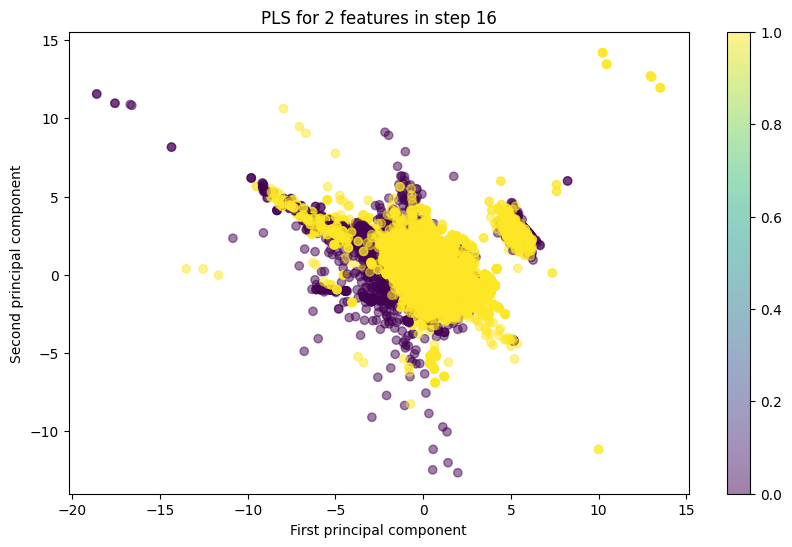

In [36]:
# Example Visualize the data after dimension reduction PLS for 2 features in step 16
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pls[:, 14], X_train_pls[:, 15], c=y_train, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar()
plt.title("PLS for 2 features in step 16")
plt.show()


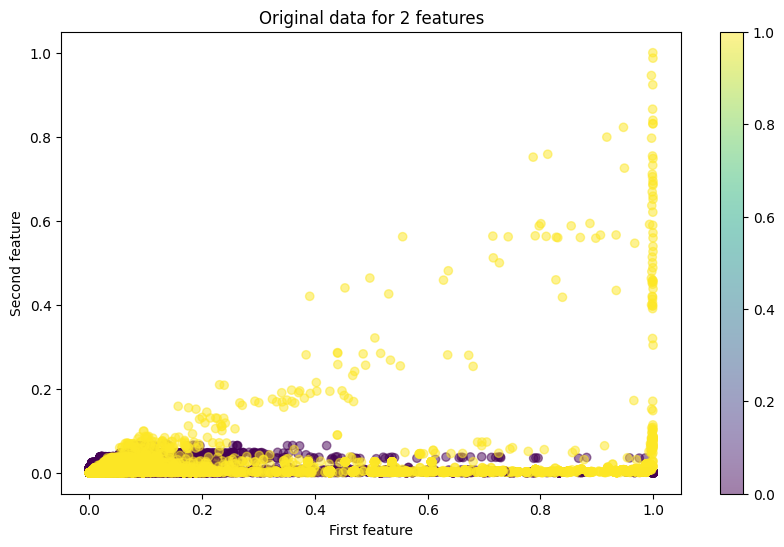

In [37]:
# Example visualize the data before dimension reduction for 2 features
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, alpha=0.5)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.colorbar()
plt.title("Original data for 2 features")
plt.show()